In [3]:
import os 
import sys 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import re
from collections import defaultdict
from IPython.display import display
import time 

In [69]:
 

def read(filaname):
    start_flag =  "=========================================== "
    
    
    df =  pd.DataFrame({'arch_name':[],'batch size':[],' seq_len':[],'memory usage':[],'self attentin time':[] })
    
    new_row = {}
     
    with open(filaname, 'r') as lines:
        
        for line in lines:
            if start_flag in line:
                if new_row: 
               
                    df.loc[len(df)] = new_row
                    
                    
                new_row = {}
                continue 
            if "CUDA out of memory" in line:
                new_row['memory usage'] = "OOM"
                new_row['self attentin time'] = "OOM"
            if ":" in line:
                line = line.strip()
                
                

                pairs = line.split(',')
                for pair in pairs:
                    
                    key,value = pair.split(":")

                    new_row[key] = value 
            
    
    return df 
path="/home/c3/code/InfiniGen/wxd-test/results"
cpu_decode_time_outpt = read(f"{path}/cpu-decode-time.log")
cpu_prefill_time_outpt = read(f"{path}/cpu-prefill-time.log")
gpu_decode_time_outpt = read(f"{path}/gpu-decode-time.log")
gpu_prefill_time_outpt = read(f"{path}/gpu-prefill-time.log")
 
 

,arch_name,batch size,seq_len,memory usage,self attentin time
0,opt-1.3b,32,256,0.404 GB,0.378
1,opt-1.3b,32,512,0.621 GB,0.713
2,opt-1.3b,32,1024,1.22 GB,1.86
3,opt-1.3b,32,2048,2.33 GB,5.87
4,opt-1.3b,64,256,0.573 GB,0.593
5,opt-1.3b,64,512,1.14 GB,1.37
6,opt-1.3b,64,1024,2.06 GB,3.59
7,opt-1.3b,64,2048,4.0 GB,13.4
8,opt-2.7b,32,256,0.355 GB,0.545
9,opt-2.7b,32,512,0.77 GB,0.862


,arch_name,batch size,seq_len,memory usage,self attentin time
0,opt-1.3b,32,256,0.885 GB,0.0132
1,opt-1.3b,32,512,2.7 GB,0.0249
2,opt-1.3b,32,1024,9.35 GB,0.0605
3,opt-1.3b,32,2048,OOM,OOM
4,opt-1.3b,64,256,1.7 GB,0.0237
5,opt-1.3b,64,512,5.34 GB,0.0489
6,opt-1.3b,64,1024,18.6 GB,0.126
7,opt-1.3b,64,2048,OOM,OOM
8,opt-2.7b,32,256,1.0 GB,0.0176
9,opt-2.7b,32,512,2.9 GB,0.0326


,prompt len,gen_len,gpu ratio,cpu ratio,Total,Prefill,Decode
0,512.0,128.0,100.0,0.0,1.777443,0.254037,1.523406
1,512.0,128.0,80.0,20.0,12.315414,0.479660,11.835754
2,512.0,128.0,60.0,40.0,22.033457,0.571269,21.462188
3,512.0,128.0,40.0,60.0,28.144579,0.636308,27.508271
4,512.0,128.0,20.0,80.0,35.349903,0.678734,34.671169
5,512.0,128.0,0.0,100.0,43.525278,0.778898,42.746380
6,512.0,256.0,100.0,0.0,3.239843,0.253728,2.986115
7,512.0,256.0,80.0,20.0,27.572557,0.440704,27.131853
8,512.0,256.0,60.0,40.0,49.515123,0.611240,48.903883
9,512.0,256.0,40.0,60.0,58.960539,0.701256,58.259283


[   prompt len   gen_len   gpu ratio   cpu ratio      Total   Prefill    Decode
5       512.0     128.0         0.0       100.0  43.525278  0.778898  42.74638,    prompt len   gen_len   gpu ratio   cpu ratio      Total   Prefill  \
4       512.0     128.0        20.0        80.0  35.349903  0.678734   

      Decode  
4  34.671169  ,    prompt len   gen_len   gpu ratio   cpu ratio      Total   Prefill  \
3       512.0     128.0        40.0        60.0  28.144579  0.636308   

      Decode  
3  27.508271  ,    prompt len   gen_len   gpu ratio   cpu ratio      Total   Prefill  \
2       512.0     128.0        60.0        40.0  22.033457  0.571269   

      Decode  
2  21.462188  ,    prompt len   gen_len   gpu ratio   cpu ratio      Total   Prefill  \
1       512.0     128.0        80.0        20.0  12.315414   0.47966   

      Decode  
1  11.835754  ,    prompt len   gen_len   gpu ratio   cpu ratio     Total   Prefill    Decode
0       512.0     128.0       100.0         0.0  1.777443 

ValueError: x and y can be no greater than 2D, but have shapes (6,) and (6, 1, 7)

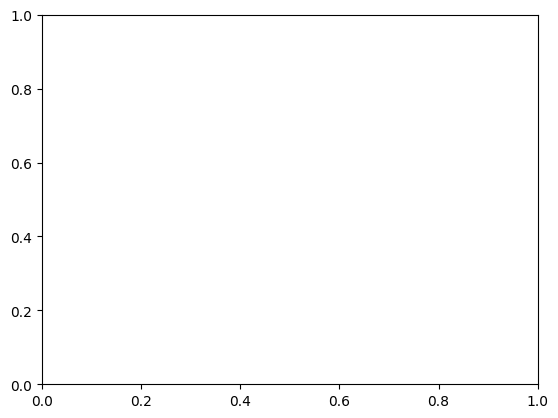

In [97]:
start_flag =  "=========================================== "
df =  pd.DataFrame({'prompt len':[],' gen_len':[],' gpu ratio':[],' cpu ratio':[],'Total':[],' Prefill':[],' Decode':[] })

new_row = {}
    
with open(f"{path}/flexgen-offload.log", 'r') as lines:
    
    for line in lines:
        if start_flag in line:
            if new_row: df.loc[len(df)] = new_row                
            new_row = {}
            continue 
        if "CUDA out of memory" in line:
            new_row['Total'] = "OOM"
            new_row['Prefill'] = "OOM"
            new_row['Decode'] = "OOM"
             
         
        pairs = line.split(',')

        for pair in pairs:
            if ":" in pair:
                key,value = pair.split(":")
                new_row[key] = float(value)  
display(df)
for prompt_len in [512,1024]:
    for gen_len in [128,256,512,1024]:
        x = []
        for ratio in range(0,101,20):
             
            x.append(df[(df[' gpu ratio']==ratio) & (df['prompt len']==prompt_len)  & (df[' gen_len']==gen_len)][''])
         
        plt.plot(x,label=f" prompt_len:{prompt_len}, gen_len:{gen_len}, ratio:{ratio}")
plt.legend(loc="upper left")
plt.show()